# TensorFlow: Linear Regression Tutorial
## By: Authors: Brian Vanderwende, Thomas Johnson III

<p>In this tutorial, we will construct a linear regression model that will be trained to estimate the amount of <b>precipitation</b> using the rdu_weather_history.csv dataset.</p>

In [2]:
#Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

<h3>Dataset Organization Functions</h3>
<p>The function <code>locate_data()</code> is going to be utilized to load the csv file that contains the data that will be utilized throughout the length of this tutorial. The dataset will returned at the end of the function.</p>

In [3]:
def locate_data():
    dataframe = pd.read_csv("./rdu_weather_history.csv")
    return dataframe

<p>The <code>clean_data(dataframe)</code> function accepts one argument (a dataset) and determines if there are any NULL values in the dataset. If there are NULL values in the dataset, the function will remove those entries from the dataset. The function will return the cleaned dataset.</p>

In [4]:
def clean_data(dataframe):
    if(dataframe.isnull().any().any()):
        clean_dataframe = dataframe.dropna()
        return clean_dataframe
    else:
        print("Dataset is clean.")
        return dataframe

<p>The function <code>export_csv(dataframe)</code> accepts one argment (a dataset) and allows the user to choose to export a clean version of the dataset for future use.</p>

In [5]:
def export_csv(dataframe):
    csv_choice = input("Do you wish to export a CSV file of clean data? Y or N\n")
    if(csv_choice == "Y"):
        dataframe.to_csv("rdu-weather-history-clean.csv")
    else:
        print("No export.")
    return

<p>The <code>start()</code> function is used run all the previous functions one after another. The function will return the dataframe originally obtained from the <code>locate_data()</code> function. The end of the dataset is printed to verify there are actual values in the dataset.</p>

In [6]:
def start():
    dataframe = locate_data()
    dataframe = clean_data(dataframe)
    export_csv(dataframe)
    print(dataframe.tail())
    return dataframe

<p>The dataset is being stored into the variable <code>pd_dataframe</code> for further use in the tutorial.</p>

In [7]:
pd_dataframe = start()

Do you wish to export a CSV file of clean data? Y or N
 N


No export.
            date  temperaturemin  temperaturemax  precipitation  snowfall  \
4525  2009-12-04            34.0            55.9           0.00       0.0   
4526  2009-12-13            36.0            42.1           0.29       0.0   
4527  2009-12-26            39.0            53.1           0.00       0.0   
4528  2009-12-28            30.9            46.0           0.00       0.0   
4529  2010-01-02            21.9            32.0           0.00       0.0   

      snowdepth  avgwindspeed  fastest2minwinddir  fastest2minwindspeed  \
4525        0.0          2.24                60.0                 10.07   
4526        0.0          2.91               250.0                  8.95   
4527        0.0          6.71               320.0                 10.07   
4528        0.0          8.05               260.0                 16.11   
4529        0.0          9.62               300.0                 19.91   

      fastest5secwinddir  ...  drizzle snow freezingrain smokehaze thunder 

<h3>Managing the Data</h3>
<p>For this tutorial, we want to use a time series in days, not a datetime object for our data. Therefore, we will utilize operations to transform the datetime object to an integer measurement corresponding to the amount of days after the initial start day of the data.</p>

In [8]:
pd_dataframe["date"]

0       2013-11-09
1       2013-11-12
2       2013-11-17
3       2013-11-18
4       2013-11-19
5       2013-11-28
6       2013-12-19
7       2013-12-21
8       2014-01-02
9       2014-01-11
10      2014-01-13
11      2014-01-15
12      2014-01-18
13      2014-01-19
14      2014-01-27
15      2014-02-08
16      2014-02-11
17      2014-02-14
18      2014-02-16
19      2014-02-19
20      2014-02-20
21      2014-03-03
22      2014-03-16
23      2014-03-17
24      2014-03-22
25      2014-03-31
26      2014-04-12
27      2014-04-15
28      2014-04-25
29      2014-04-27
           ...    
4500    2016-06-05
4501    2016-06-06
4502    2016-06-07
4503    2016-06-20
4504    2016-06-21
4505    2016-06-25
4506    2016-06-28
4507    2016-07-05
4508    2016-07-07
4509    2016-07-17
4510    2016-07-20
4511    2016-07-21
4512    2016-07-23
4513    2016-07-25
4514    2016-07-27
4515    2016-07-28
4516    2016-07-31
4517    2009-09-28
4518    2009-10-07
4519    2009-10-09
4520    2009-10-13
4521    2009

<p>First, finding the datetime object that is latest datetime object, and earliest datetime object.</p>

In [9]:
# Reference:http://www.datasciencemadesimple.com/get-minimum-value-column-python-pandas/
#Reference: https://stackoverflow.com/questions/23178129/getting-min-and-max-dates-from-a-pandas-dataframe
print(pd_dataframe["date"].max())

2019-05-26


In [10]:
print(pd_dataframe["date"].min())
min_date = pd_dataframe["date"].min()

2007-01-01


<h4>From Datetime Object to Measured Days</h4>
<p>The code below will iterate throughout the series of datetime objects. The datetime objects are placed into a list and said list is used to construct a pandas series to replace the datetime objects of the current dataframe.</p>
<p>For this to work, the Python datetime object must be loaded and ready for use.</p>

In [11]:
#Reference https://stackoverflow.com/questions/31687420/convert-datetime-datetime-object-to-days-since-epoch-in-python
#Reference:https://www.journaldev.com/23365/python-string-to-datetime-strptime
#Reference:https://stackoverflow.com/questions/1345827/how-do-i-find-the-time-difference-between-two-datetime-objects-in-python
#Reference:https://www.tutorialspoint.com/python_pandas/python_pandas_iteration.htm
import datetime
from datetime import timedelta
from datetime import datetime

numeric_dates = []
temp_date_series = pd_dataframe["date"]
for row, date in temp_date_series.iteritems():
    primary_date = datetime.strptime(date, "%Y-%m-%d")
    start_date = datetime.strptime(min_date, "%Y-%m-%d")
    relative_date = (primary_date - start_date).days
    date = int(relative_date)
    numeric_dates.append(date)
numeric_dates_series = pd.Series(numeric_dates)
print(numeric_dates_series)
pd_dataframe["date"] = numeric_dates_series

0       2504
1       2507
2       2512
3       2513
4       2514
5       2523
6       2544
7       2546
8       2558
9       2567
10      2569
11      2571
12      2574
13      2575
14      2583
15      2595
16      2598
17      2601
18      2603
19      2606
20      2607
21      2618
22      2631
23      2632
24      2637
25      2646
26      2658
27      2661
28      2671
29      2673
        ... 
4480    3443
4481    3444
4482    3445
4483    3458
4484    3459
4485    3463
4486    3466
4487    3473
4488    3475
4489    3485
4490    3488
4491    3489
4492    3491
4493    3493
4494    3495
4495    3496
4496    3499
4497    1001
4498    1010
4499    1012
4500    1016
4501    1042
4502    1046
4503    1059
4504    1062
4505    1068
4506    1077
4507    1090
4508    1092
4509    1097
Length: 4510, dtype: int64


<p>We check the values of the date column to see if there are any values other than integers within the data. There are some NaN values that have appeared. We have a few options of how to handle such. We can remove the incomplete data, and work with the remainder of the data that is intact. Another solution is to attempt to find the reason as to why our datetime object to integer code produced NaN values for that portion of the data. For the purpose of this tutorial, we will remove the entries of data that have NaN values by running the <code>clean_data(dataframe)</code> function once again.</p>

In [12]:
pd_dataframe["date"]

0       2504.0
1       2507.0
2       2512.0
3       2513.0
4       2514.0
5       2523.0
6       2544.0
7       2546.0
8       2558.0
9       2567.0
10      2569.0
11      2571.0
12      2574.0
13      2575.0
14      2583.0
15      2595.0
16      2598.0
17      2601.0
18      2603.0
19      2606.0
20      2607.0
21      2618.0
22      2631.0
23      2632.0
24      2637.0
25      2646.0
26      2658.0
27      2661.0
28      2671.0
29      2673.0
         ...  
4500    1016.0
4501    1042.0
4502    1046.0
4503    1059.0
4504    1062.0
4505    1068.0
4506    1077.0
4507    1090.0
4508    1092.0
4509    1097.0
4510       NaN
4511       NaN
4512       NaN
4513       NaN
4514       NaN
4515       NaN
4516       NaN
4517       NaN
4518       NaN
4519       NaN
4520       NaN
4521       NaN
4522       NaN
4523       NaN
4524       NaN
4525       NaN
4526       NaN
4527       NaN
4528       NaN
4529       NaN
Name: date, Length: 4510, dtype: float64

In [13]:
pd_dataframe = clean_data(pd_dataframe)

In [14]:
pd_dataframe.columns

Index(['date', 'temperaturemin', 'temperaturemax', 'precipitation', 'snowfall',
       'snowdepth', 'avgwindspeed', 'fastest2minwinddir',
       'fastest2minwindspeed', 'fastest5secwinddir', 'fastest5secwindspeed',
       'fog', 'fogheavy', 'mist', 'rain', 'fogground', 'ice', 'glaze',
       'drizzle', 'snow', 'freezingrain', 'smokehaze', 'thunder', 'highwind',
       'hail', 'blowingsnow', 'dust', 'freezingfog'],
      dtype='object')

<p>Reference: https://datascience.stackexchange.com/questions/30215/what-is-one-hot-encoding-in-tensorflow?rq=1</p>
<p>Reference: https://www.tensorflow.org/tutorials/keras/basic_regression</p>
<p>It is possible that qualitative as well as quantitative data within your dataset. Whether determine such data to be relevant ot the development of your machine learning model is dependent on a number of factors outside of the development of the machine learning model itself. To utilize categorical data, the catrgorical should be transformed to a one-hot so the model can have a numerical value to use (Djib2011, datascience.stackexchange.com). This can become tedious, and depending on if and how you apply <b>one-hot encoding</b> to your data you can end up with various additional features in the to this linear regression model (Djib2011, datascience.stackexchange.com). For the sake of this tutorial, the next section of code will remove non-numerical data from our dataset to keep the remainder of the content basic. If you desire to learn more about one-hot and how to apply the concept to your categorical data, please feel free to reference <a href="https://datascience.stackexchange.com/questions/30215/what-is-one-hot-encoding-in-tensorflow?rq=1">https://datascience.stackexchange.com/questions/30215/what-is-one-hot-encoding-in-tensorflow?rq=1</a> as well as <a href="https://www.tensorflow.org/tutorials/keras/basic_regression">https://www.tensorflow.org/tutorials/keras/basic_regression</a> for further details and examples on the subject. Note that transforming categorical data to a one-hot will allow that categorial data to play a role in the training of your machine learing model.</p>

In [15]:
pd_dataframe_numeric=pd_dataframe.select_dtypes(include=["number"])

<p>Now only numerical data is included.</p>

In [16]:
pd_dataframe_numeric.tail()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed
4505,1068.0,71.1,84.9,0.00,0.0,0.0,6.26,50.0,16.11,60.0,23.04
4506,1077.0,71.1,78.1,1.25,0.0,0.0,4.70,230.0,12.08,200.0,17.00
4507,1090.0,73.0,95.0,0.42,0.0,0.0,6.71,240.0,31.09,240.0,38.92
4508,1092.0,73.0,93.0,0.06,0.0,0.0,7.61,240.0,23.04,260.0,31.09
4509,1097.0,68.0,90.0,0.00,0.0,0.0,4.03,210.0,14.09,220.0,16.11


<h3>The Model:</h3>

<h4>Setting Up Data</h4>

<p>Reference: https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas</p>
<p>The next section of code takes the dataset stored in <code>pd_dataframe_numeric</code> and separates it into our training set (<code>training_set</code>) and the testing set (<code>testing_set</code>). The <code>frac</code> argument of the <code>.sample()</code> method determines the portion of data to be saved from the <code>pd_dataframe_numeric</code> dataset to the <code>training_set</code>. The <code>random_state</code> argument of the <code>.sample()</code> is used if you want to randomly separate the data (MikeL, stackoverflow.com). The data stored in <code>training_set</code> is then dropped from the <code>testing_set</code> utilizing the <code>.drop()</code> method. The training and testing sets are now generated and ready to be used.</p>

In [17]:
#For more ways to split dataset for test and training https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
#Method used in the referenced tensorflow example is present in stackoverflow link
#Dividing dataset into trining and testing
training_set = pd_dataframe_numeric.sample(frac=0.9, random_state=0)
testing_set = pd_dataframe_numeric.drop(training_set.index)

<p>We need to extract statistical information from the data for the purpose of standardizing the data so the linear regression model is not reliant on the specific measurements that compose the training dataset (Regression: Predict Fuel Efficiency, <a href="https://www.tensorflow.org/tutorials/keras/basic_regression">https://www.tensorflow.org/tutorials/keras/basic_regression</a>). Since <b>precipitation</b> is what the linear regression model is being trained for, the precipitation column will be removed from the statistics extracted.</p>

In [18]:
training_set_statistics_inclusive = training_set.describe()
training_set_statistics_inclusive.pop("precipitation")
training_set_statistics = training_set_statistics_inclusive.transpose()
print(training_set_statistics)

                       count         mean          std    min      25%  \
date                  4041.0  2269.738679  1309.953454   0.00  1134.00   
temperaturemin        4041.0    50.746548    16.197730   7.20    37.00   
temperaturemax        4041.0    72.121628    16.470546  23.20    60.10   
snowfall              4041.0     0.012720     0.197227   0.00     0.00   
snowdepth             4041.0     0.014801     0.180454   0.00     0.00   
avgwindspeed          4041.0     5.879555     2.938874   0.00     3.80   
fastest2minwinddir    4041.0   172.853254    94.088385  10.00    80.00   
fastest2minwindspeed  4041.0    15.992970     5.186387   4.92    12.97   
fastest5secwinddir    4041.0   176.557783    96.258237  10.00    90.00   
fastest5secwindspeed  4041.0    21.825229     6.991912   6.93    17.00   

                          50%      75%      max  
date                  2286.00  3403.00  4527.00  
temperaturemin          52.00    66.00    80.10  
temperaturemax          73.90    86

<p>Next, we remove precipitation from the features that will be used in ther training process. The linear regression model is intended to estimate precipitation, so removing precipitation column from the "labels" (Regression: Predict Fuel Efficiency, <a href="https://www.tensorflow.org/tutorials/keras/basic_regression">https://www.tensorflow.org/tutorials/keras/basic_regression</a>) is necessary for the training of the linear regression model.</p>

In [19]:
#Focusing on the precipitation as the focus of the linear regression
training_set_labels = training_set.pop("precipitation")
testing_set_labels = testing_set.pop("precipitation")

<p>The linear regression model will use these values for precipitation to improve its estimations during training.</p>

In [20]:
print(training_set_labels)

4041    0.00
2233    0.00
4390    0.00
4370    0.54
2676    0.00
2198    0.00
2045    0.00
2849    0.00
2785    0.00
837     0.45
533     0.76
1392    0.00
1708    0.00
2722    0.01
1960    0.11
73      0.00
815     0.02
3642    0.00
309     0.00
483     0.00
3259    0.00
4044    0.00
131     0.00
3894    0.08
3130    0.89
3806    0.02
1954    0.00
3025    0.00
2418    0.00
2965    0.00
        ... 
1419    0.00
1415    0.00
3983    0.08
4497    0.02
4457    0.12
1012    0.00
1183    0.01
401     0.00
2015    0.00
1259    0.00
2486    0.00
21      0.36
1311    0.00
2823    0.00
2449    0.27
2307    0.00
3326    0.00
238     0.00
3118    0.00
3678    0.00
675     0.03
1537    0.00
1950    0.00
851     0.00
698     0.00
4102    0.60
1359    0.00
1139    0.00
4357    0.00
3462    0.00
Name: precipitation, Length: 4041, dtype: float64


<h4>Standardization of the data</h4>
<p>Now a function will be written to standardize the data stored within <code>training_set</code> and <code>testing_set</code>. Note, this code is based on the <code>norm(x)</code> function at Regression: Predict Fuel Efficiency, <a href="https://www.tensorflow.org/tutorials/keras/basic_regression">https://www.tensorflow.org/tutorials/keras/basic_regression</a>.</p>

In [21]:
#Function for standardizing the data
def standardize_training(some_dataset):
    standardized_data = (some_dataset-training_set_statistics["mean"])/training_set_statistics["std"]
    return standardized_data

In [50]:
standardized_training_set = standardize_training(training_set)
standardized_testing_set = standardize_training(testing_set)

<h4>Putting the Model Together</h4>
<p>The model constructed here was made using documentation from both <a href="https://www.tensorflow.org/tutorials/keras/basic_regression">Regression: Predict Fuel Efficiency</a>, and <a href="https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential">tf.keras.models.Sequential</a>. There are multiple ways to construct a linear regression model and other machine learning models. The number of layers can be altered, the interconnectivity between layers, the activation function for each layer, layer weights, the optimizer chosen, and the loss function that is utilized to name a few aspects. Due note that documentation will describe how layers, optimizers, loss functions, and the overall structure chosen for the model will function. Due note that there are restrictions on the extent modification can be made (for example, a layer that accepts images for input would likely not be best for the analysis oif a dataset that is completely composed of numeric data). To generate a model that is highly accurate takes experimentation. Accuracy can also be affected by the iterations that are given for training (epochs) as well as the amount and quality of data that is used for training.</p>

<p>The linear regression model constructed for this tutorial four layers. The model being <b>sequential</b> means that each layer will be connected in the structure of a straight line to one another(tf.keras.models.Sequential, <a href="https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential">https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential</a>). The model uses <code>tf.layers.Dense</code> which forms a layer that calls a "Densely-connected layer class" (tf.layers.Dense, <a href="https://www.tensorflow.org/api_docs/python/tf/layers/Dense">https://www.tensorflow.org/api_docs/python/tf/layers/Dense</a>), or that the each "input is connected to every output by a weight" (Jeremy Howard, <a href="https://forums.fast.ai/t/dense-vs-convolutional-vs-fully-connected-layers/191/3">https://forums.fast.ai/t/dense-vs-convolutional-vs-fully-connected-layers/191/3</a>). </p>

<p>The first three layers have 30 inputs each. The activation function is Scaled Exponential Linear Units, or SELU, which has benefits over using the Rectified Linear Units, or ReLU (A First Introduction to SELUs and Why You Should Start Using Them as Your Activation Functions, <a href="https://www.tensorflow.org/api_docs/python/tf/nn/selu">https://www.tensorflow.org/api_docs/python/tf/nn/selu</a>). The SELU activation function, from "each layer [preserving] the mean and variance from the previous layer" (A First Introduction to SELUs and Why You Should Start Using Them as Your Activation Functions, <a href="https://www.tensorflow.org/api_docs/python/tf/nn/selu">https://www.tensorflow.org/api_docs/python/tf/nn/selu</a>), provides a technique for allowing the model to have more efficient training than alternatives to SELU.</p>

<p>The a chosen optimizer with a learning rate is defined. The process for finding the correct optimizer depends on a few factors, one of which being how the model is expected to improve itself. The loss function is the function that is to be minimized to show that the model is improving. Metrics are the measurements that will be used for measuring the progress and accuracy of the model (tf.metrics, <a href="https://www.tensorflow.org/api_docs/python/tf/metrics">https://www.tensorflow.org/api_docs/python/tf/metrics</a>).</p>

In [51]:
def four_layer_regression():
    regression_model = tf.keras.models.Sequential()
    regression_model.add(tf.layers.Dense(30, activation = tf.nn.selu, input_shape=[len(training_set.keys())]))
    regression_model.add(tf.layers.Dense(30, activation = tf.nn.selu))
    regression_model.add(tf.layers.Dense(30, activation = tf.nn.selu))
    regression_model.add(tf.layers.Dense(1))
    regression_optimizer = tf.keras.optimizers.Adadelta(0.001849)
    regression_model.compile(loss = "mean_squared_error", optimizer =regression_optimizer,metrics=['mean_absolute_error', 'mean_squared_error'])
    return regression_model

linear_regression_model = four_layer_regression()
    

<p>Here are general, rudimentary details regarding the linear regression model that has been created.</p>

In [52]:
linear_regression_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


<p>The model must be tested to ensure it gives accurate outputs (Regression: Predict Fuel Efficiency, <a href="https://www.tensorflow.org/tutorials/keras/basic_regression">https://www.tensorflow.org/tutorials/keras/basic_regression</a>).</p>

In [53]:
#Check the datatype and number of outputs
example_run_batch = standardized_training_set[:20]
example_run_batch_output = linear_regression_model.predict(example_run_batch)
example_run_batch_output

array([[-1.3435847 ],
       [-0.07389441],
       [ 0.8123844 ],
       [-0.11726663],
       [-1.1788771 ],
       [-0.7388926 ],
       [ 1.1147366 ],
       [ 0.38848928],
       [ 0.17193696],
       [ 0.21014453],
       [-0.41296792],
       [-0.14203547],
       [ 0.02243475],
       [-0.03943168],
       [ 0.52270687],
       [-0.671592  ],
       [ 0.7426454 ],
       [ 0.49319753],
       [-0.6734264 ],
       [-1.2400191 ]], dtype=float32)

<p>For the model, we will train it for 2000 iterations, or epochs.</p>

In [54]:
#Number of iterations
training_epochs = 2000

<p>The next line of code will initiate the training. We pass the arguments <code>normalized_training_set</code> for the training data, <code>training_set_labels</code> for the feature it will be training to estimate, <code>epochs</code> is passed the number of iterations for training, <code>validation_split</code> tells the <code>.fit()</code> method the portion of data from <code>normalized_training_set</code> that will be utilized to validate the model. The <code>verbose</code> argument accepts the output that the user wants to see in regard to the training process by assigning <code>verbose</code> the value of 0, 1, 2, or 3.</p>

In [55]:
regression_history = linear_regression_model.fit(standardized_training_set, training_set_labels, epochs = training_epochs, validation_split = 0.15, verbose=1)

Train on 3434 samples, validate on 607 samples
Epoch 1/2000
3434/3434 [==============================] - 0s 110us/sample - loss: 0.5319 - mean_absolute_error: 0.5705 - mean_squared_error: 0.5319 - val_loss: 0.5509 - val_mean_absolute_error: 0.5790 - val_mean_squared_error: 0.5509
Epoch 2/2000
3434/3434 [==============================] - 0s 45us/sample - loss: 0.4827 - mean_absolute_error: 0.5396 - mean_squared_error: 0.4827 - val_loss: 0.5029 - val_mean_absolute_error: 0.5486 - val_mean_squared_error: 0.5029
Epoch 3/2000
3434/3434 [==============================] - 0s 43us/sample - loss: 0.4396 - mean_absolute_error: 0.5106 - mean_squared_error: 0.4396 - val_loss: 0.4600 - val_mean_absolute_error: 0.5198 - val_mean_squared_error: 0.4600
Epoch 4/2000
3434/3434 [==============================] - 0s 42us/sample - loss: 0.4010 - mean_absolute_error: 0.4830 - mean_squared_error: 0.4010 - val_loss: 0.4214 - val_mean_absolute_error: 0.4925 - val_mean_squared_error: 0.4214
Epoch 5/2000
3434/34

<p>The code below will detail the end of the history for the linear regression model that has been trained through the <code>.fit()</code> method. The <code>.history</code> method is utilized to keep track of the data regarding the values of the loss function and the metrics that have been applied for measuring the effectiveness of the linear regression model.</p>

In [56]:
regression_history_summary = pd.DataFrame(regression_history.history)
regression_history_summary.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
1995,0.102668,0.168761,0.102668,0.147623,0.187450,0.147623
1996,0.102671,0.168719,0.102671,0.147621,0.187436,0.147621
1997,0.102663,0.168813,0.102663,0.147608,0.187429,0.147608
1998,0.102661,0.168843,0.102661,0.147607,0.187410,0.147607
1999,0.102660,0.168817,0.102660,0.147619,0.187361,0.147619


<p>Reference: vijay m and nbro, <a href="https://stackoverflow.com/questions/44843581/what-is-the-difference-between-model-fit-an-model-evaluate-in-keras">https://stackoverflow.com/questions/44843581/what-is-the-difference-between-model-fit-an-model-evaluate-in-keras</a></p>
<p>The <code>.evaluate()</code> method is called so that we can see the accuracy the trained linear regression model in regard to our <code>standardized_testing_set</code>. The first argument is <code>standardized_testing_set</code>, or the data that we want to use to measure the model's effectiveness; the second argument is the <code>testing_set_labels</code>, or the feature that the linear regression model will be trained to estimate; the <code>steps</code> argument is the number of times the model will be subject to measurement until the final determination fo the model's effectiveneess.</p>

In [57]:
linear_regression_model.evaluate(standardized_testing_set,testing_set_labels,steps=45)

45/45 [==============================] - 0s 1ms/step - loss: 0.1363 - mean_absolute_error: 0.1751 - mean_squared_error: 0.1363


[0.13630665838718414, 0.17514947, 0.1363066]

<p>The next line of code shows the ouputs that are gained from the test data. To get the estimations the model will calculate from the test data, we use the <code>.predict()</code> method with the argument <code>standardized_testing_set</code>.</p>

In [58]:
print(linear_regression_model.predict(standardized_testing_set))

[[-7.18393102e-02]
 [ 3.81564349e-02]
 [ 4.99448646e-03]
 [ 1.98758185e-01]
 [ 1.76751651e-02]
 [-1.15659051e-02]
 [-1.42687140e-03]
 [-6.80909157e-02]
 [ 1.39481902e-01]
 [ 3.33620101e-01]
 [ 1.29838705e-01]
 [-6.39365464e-02]
 [ 3.36515605e-01]
 [ 1.91514149e-01]
 [ 3.28224674e-02]
 [ 2.80331343e-01]
 [ 1.78023577e-01]
 [ 4.95144203e-02]
 [ 1.52298827e-02]
 [ 1.77479386e-01]
 [ 1.58837721e-01]
 [ 9.92750749e-02]
 [ 1.51238605e-01]
 [ 2.01022357e-01]
 [-4.67449939e-03]
 [ 7.37906024e-02]
 [ 2.36980498e-01]
 [ 3.92675489e-01]
 [ 9.84809399e-02]
 [ 4.87672947e-02]
 [-2.29608357e-01]
 [-8.84924643e-03]
 [ 3.73498678e-01]
 [ 2.58022308e-01]
 [ 3.59857202e-01]
 [ 2.51497999e-02]
 [ 2.57774860e-01]
 [ 1.35033518e-01]
 [ 5.31584956e-02]
 [ 1.13713033e-02]
 [-3.18524130e-02]
 [ 1.06935531e-01]
 [ 1.52369216e-01]
 [-4.51553650e-02]
 [ 4.99358177e-01]
 [ 3.00424639e-04]
 [ 1.54310375e-01]
 [ 1.68439075e-02]
 [ 1.08700030e-01]
 [ 2.14026630e-01]
 [-2.40351446e-02]
 [-1.23307183e-01]
 [ 2.3140043

<p>The next section is heavily based on the Tensorflow Linear Regression tutorial cited previously within this tutorial.</p>

In [59]:
import matplotlib.pyplot as plt

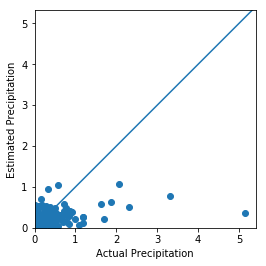

In [66]:
test_estimations = linear_regression_model.predict(standardized_testing_set).flatten()
plt.scatter(testing_set_labels, test_estimations)
plt.xlabel("Actual Precipitation")
plt.ylabel("Estimated Precipitation")
plt.axis("equal")
plt.axis("square")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-50,50], [-50,50])

<p>The code below displays a histogram visualizing the distribution of error between the estimations calculated by the linear regression model in regard to the test data.</p>

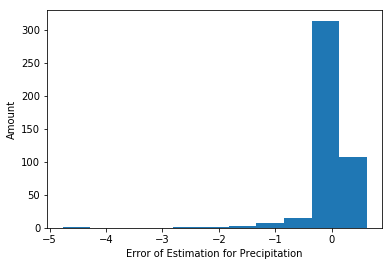

In [64]:
linear_regression_error = test_estimations - testing_set_labels
plt.hist(linear_regression_error, bins =11)
plt.xlabel("Error of Estimation for Precipitation")
_ = plt.ylabel("Amount")